# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /home/alexabades/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /home/alexabades/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /home/alexabades/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /home/alexabades/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /home/alexabades/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /home/alexabades/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /home/alexabades/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /home/alexabades/.pytorch/F_MNIST_data/FashionMNIST/raw



Here we can see one of the images.

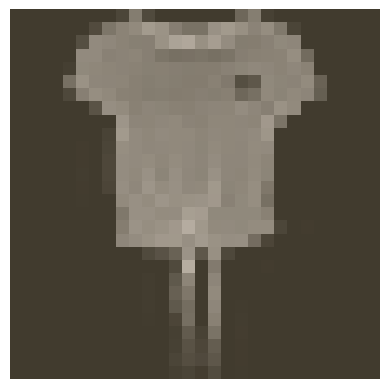

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

In [15]:
torch.flatten(image[0,:], start_dim=0).shape[0], 28*28, 128*2, label

(784,
 784,
 256,
 tensor([0, 7, 8, 3, 8, 9, 8, 9, 3, 0, 0, 0, 4, 1, 3, 7, 4, 4, 4, 5, 7, 6, 7, 9,
         8, 8, 8, 0, 9, 1, 5, 2, 4, 9, 8, 7, 8, 4, 2, 8, 2, 1, 7, 2, 7, 5, 7, 7,
         9, 7, 5, 9, 8, 8, 5, 5, 3, 8, 2, 7, 3, 2, 1, 8]))

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [19]:
from torch import nn
from collections import OrderedDict
from torch import optim

# TODO: Define your network architecture here
n_features = torch.flatten(image[0,:], start_dim=0).shape[0]  # Input features 784
n_hidden = [256, 128, 64]
n_output = 10

model = nn.Sequential(OrderedDict([
                        ('input', nn.Linear(n_features, n_hidden[0])),
                        ('relu1', nn.ReLU()),
                        ('fc1', nn.Linear(n_hidden[0], n_hidden[1])),
                        ('relu2', nn.ReLU()),
                        ('fc2', nn.Linear(n_hidden[1], n_hidden[2])),
                        ('relu2', nn.ReLU()),
                        ('output', nn.Linear(n_hidden[2], n_output)),
                        ('Lsoft', nn.LogSoftmax(dim=1))
]))

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [21]:
# TODO: Create the network, define the criterion and optimizer

criterion = nn.NLLLoss()
optimaizer = optim.Adam(model.parameters(), lr=0.003)


In [22]:
# TODO: Train the network here
epochs = 10 
for e in range(epochs):
    running_loss = 0 
    for images, labels in trainloader:
        # Flatten the images 
        images = images.view(images.shape[0], -1)

        # Set to zero the gradients
        optimaizer.zero_grad()

        # Pass images through the model 
        logits = model(images)
        # Calculate the loss 
        loss = criterion(logits, labels)
        # Do the backward step 
        loss.backward()
        # substract the gradients from the weights 
        optimaizer.step()
        # substract the loss 
        running_loss += loss.item()
    else: 
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.5131008010397333
Training loss: 0.39529136933688164
Training loss: 0.3580767637821657
Training loss: 0.33073849267542743
Training loss: 0.31886610356189293
Training loss: 0.3042292430329679
Training loss: 0.29303851535420683
Training loss: 0.2843984873977297
Training loss: 0.2740593396667351
Training loss: 0.2650544063718334


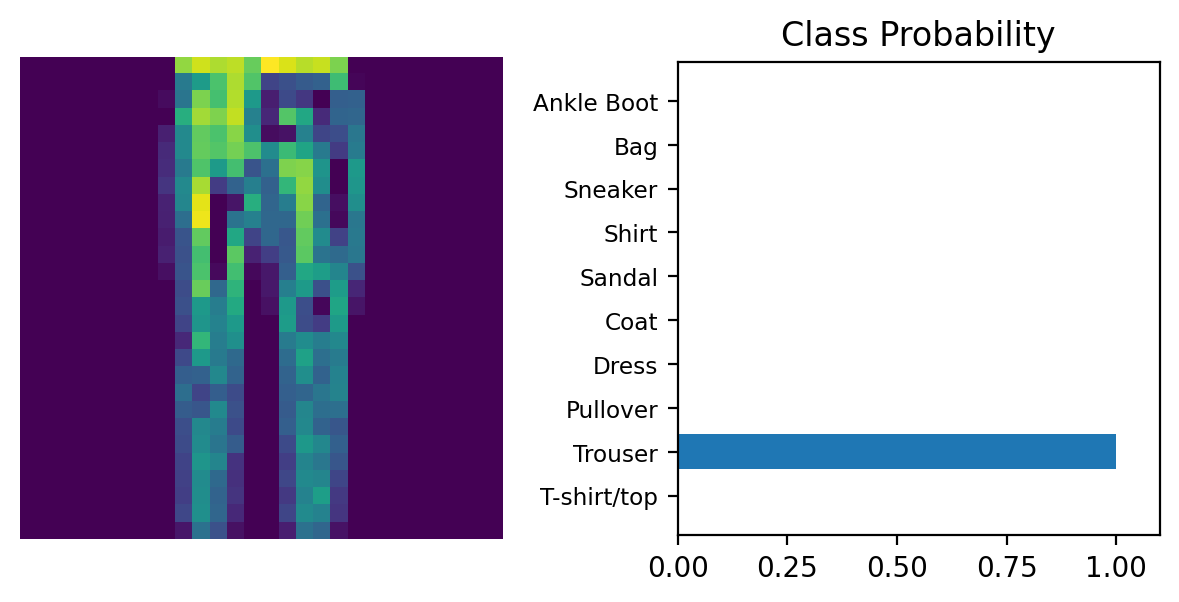

In [23]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = next(dataiter)
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)


# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(logps)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

In [33]:
images, labels = next(iter(testloader))
# Get the class probabilities

ps = torch.exp(model(images))

# top_p, top_class = ps.topk(1, dim=1)

# equals = top_class == labels.view(*top_class.shape)

# accuracy = torch.mean(equals.type(torch.FloatTensor))
# print(f'Accuracy: {accuracy.item()*100}%')

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1792x28 and 784x256)